<a href="https://colab.research.google.com/github/Valtern/machinelearningsmt5/blob/main/TG15_2341720067_ANTONIUS_KAHARAP_KAUTSAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LAB 1

In [ ]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import cv2

from skimage.feature import hog
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow.keras import layers, models

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load images and labels from a directory structure
def load_dataset(img_dir):
    p = Path(img_dir)
    img_list = []
    for folder in p.glob('*'):
        label = folder.name
        for file in folder.glob('*.jpg'):
            img = cv2.imread(str(file))
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img_list.append((img, label))
    return img_list

train_dir = "/content/drive/MyDrive/MLearning/images/training"
test_dir  = "/content/drive/MyDrive/MLearning/images/test"

train_img = load_dataset(train_dir)
test_img  = load_dataset(test_dir)

print(f"Number of training samples: {len(train_img)}")
print(f"Number of testing samples: {len(test_img)}")

Number of training samples: 240
Number of testing samples: 160


In [ ]:
# Preprocess images: resize and encode labels
def resize_image(img, size=(256,256)):
    return cv2.resize(img, size)

def label_encoder(label):
    return 1 if label == 'day' else 0

def preprocess(img_list):
    X = []
    y = []
    for img, label in img_list:
        img_std = resize_image(img)
        X.append(img_std)
        y.append(label_encoder(label))
    return X, y

X_train_img, y_train = preprocess(train_img)
X_test_img,  y_test  = preprocess(test_img)

In [ ]:
# Extract HOG features
def extract_hog(X_imgs):
    feats = []
    for img in X_imgs:
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        hog_feat = hog(gray,
                       orientations=9,
                       pixels_per_cell=(8,8),
                       cells_per_block=(2,2),
                       block_norm='L2-Hys',
                       visualize=False,
                       feature_vector=True)
        feats.append(hog_feat)
    return np.array(feats)

X_train_feat = extract_hog(X_train_img)
X_test_feat  = extract_hog(X_test_img)

In [ ]:
# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_feat)
X_test_scaled  = scaler.transform(X_test_feat)

In [ ]:
# validation
# Split training data for validation
X_train, X_val, y_train, y_val = train_test_split(
    X_train_scaled, y_train,
    test_size=0.2,
    random_state=42
)

In [ ]:
# format so as to be compatible with TensorFlow/Keras.
# Convert labels to numpy arrays (required for Keras)
y_train = np.array(y_train)
y_val = np.array(y_val)
y_test = np.array(y_test)

In [ ]:
# model with three layers (Input, Hidden Layers with ReLU, and an Output Layer with Sigmoid).
# Build a simple feedforward neural network
# Define model architecture
# input_dim is the number of features in the dataset
# Hidden layer -> 128 neurons, ReLU activation
# Hidden layer -> 64 neurons, ReLU activation
# Output layer -> 1 neuron, Sigmoid activation (for binary classification)

input_dim = X_train.shape[1]
model = models.Sequential([
    layers.Input(shape=(input_dim,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │     4,428,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,436,737 (16.92 MB)

 Trainable params: 4,436,737 (16.92 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# data for 20 epochs.
# Train the model
history = model.fit( X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 109ms/step - accuracy: 0.7035 - loss: 1.0198 - val_accuracy: 0.9583 - val_loss: 0.2830
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.9756 - loss: 0.2647 - val_accuracy: 0.9375 - val_loss: 0.3602
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9950 - loss: 0.0225 - val_accuracy: 0.9792 - val_loss: 0.2633
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 1.0000 - loss: 1.4547e-05 - val_accuracy: 0.9792 - val_loss: 0.2154
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 1.0000 - loss: 2.5410e-05 - val_accuracy: 0.9792 - val_loss: 0.1828
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 1.0000 - loss: 1.2959e-05 - val_accuracy: 0.9792 - val_loss: 0.1651
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 1.0000 - loss: 4.7872e-06 - val_accuracy: 0.9792 - val_loss: 0.1561
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 1.0000 - loss: 4.9505e-06 - val_accuracy: 0.979

In [ ]:
# Assess the model's performance on the
# Evaluate the model on test data
test_loss, test_acc = model.evaluate(X_test_scaled, y_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8629 - loss: 2.0829


In [ ]:
# confusion matrix
# Generate classification report and confusion matrix
y_pred_prob = model.predict(X_test_scaled)

y_pred = (y_pred_prob > 0.5).astype(int)
print(classification_report(y_test, y_pred))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
              precision    recall  f1-score   support

           0       0.88      0.85      0.87        80
           1       0.86      0.89      0.87        80

    accuracy                           0.87       160
   macro avg       0.87      0.87      0.87       160
weighted avg       0.87      0.87      0.87       160



[[68 12]
 [ 9 71]]


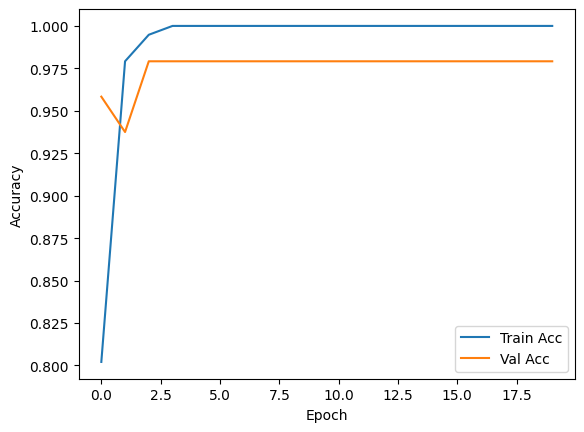

In [ ]:
print(confusion_matrix(y_test, y_pred))
# Visualize training history
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# format for deployment use.
# Save the trained model

import pickle
# 1. Save Model
# Using the .keras format (recommended by Keras)
model.save('day_night_model.keras')

print("✅ Model successfully saved as: day_night_model.keras")
# 2. Save Scaler
with open('scaler.pkl', 'wb') as f:
  pickle.dump(scaler, f)

✅ Model successfully saved as: day_night_model.keras


# Lab 2

I followed every step on lab 2

In [17]:
from IPython.display import IFrame

IFrame(
    src="https://anton213213-daynight-classifier-antonius-kaharap-9cad4e2.hf.space",
    width=850,
    height=450
)


# Lab Assingment

**NOTE: This is only the back end service meant for our jawara application to use in order to run the OCR and machine learning logic... it obviously wont do anything on its own..**

In [19]:
IFrame(
    src="https://anton213213-jawara-face-recognition.hf.space",
    width=850,
    height=450
)
